## Load libraries

In [5]:
# Libraries to work cross-platform
import os

# Libraries to work with dataset
import numpy as np

# Libraries to visualize data
import seaborn as sns
import matplotlib.cm as cm
from cluster_visualization_helper import (
    compute_cluster_visualization,
    visualize_cluster)  # user-defined functions

## Configurate and declare global variables

In [6]:
os_name = os.name

if os_name == 'nt':  
    """Windows platform"""
    BASE_DIR = "E:/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"
    INPUT_DIR = BASE_DIR + "DATASET/INPUT/"
    OUTPUT_DIR = BASE_DIR + "DATASET/OUTPUT/"
elif os_name == 'posix':
    """Linux platform"""
    BASE_DIR = "/media/pinkalinux/WORK/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"
    INPUT_DIR = BASE_DIR + "DATASET/INPUT/"
    OUTPUT_DIR = BASE_DIR + "DATASET/OUTPUT/"

SEED = 6886
%matplotlib inline

## Import data

In [7]:
skill_embeddings = np.load(OUTPUT_DIR + "skill_feat_embeddings.npy")
skill_embeddings.shape

(361584, 600)

## Reduce dimensions to visualize datapoints in 2D

In [9]:
# Compute PCA and t-SNE components
_, _, tsne_datapoint = compute_cluster_visualization(
    X=skill_embeddings, pca=False, tsne=True, mds=False, seed=SEED
)

Start t-SNE 2021-05-03 00:47:13.606799
End t-SNE 2021-05-03 03:35:52.889698
t-SNE duration 2:48:39.282899


In [12]:
# Compute PCA and t-SNE components
pca_datapoint, _, _ = compute_cluster_visualization(
    X=skill_embeddings, pca=True, tsne=False, mds=False, seed=SEED
)

Start PCA 2021-05-03 09:43:54.819385
End PCA 2021-05-03 09:44:42.214394
PCA duration 0:00:47.395009


In [14]:
pca_datapoint.shape

(361584, 2)

In [15]:
tsne_datapoint.shape

(361584, 2)

In [21]:
# Save PCA and t-SNE data points to numpy file
np.save(OUTPUT_DIR + "skills_wide_pca_datapoints", pca_datapoint)
np.save(OUTPUT_DIR + "skills_wide_tsne_datapoints", tsne_datapoint)

Start PCA 2021-05-03 09:55:59.830668
End PCA 2021-05-03 09:55:59.887890
PCA duration 0:00:00.057222

Start t-SNE 2021-05-03 09:55:59.887890
End t-SNE 2021-05-03 09:55:59.934763
t-SNE duration 0:00:00.046873



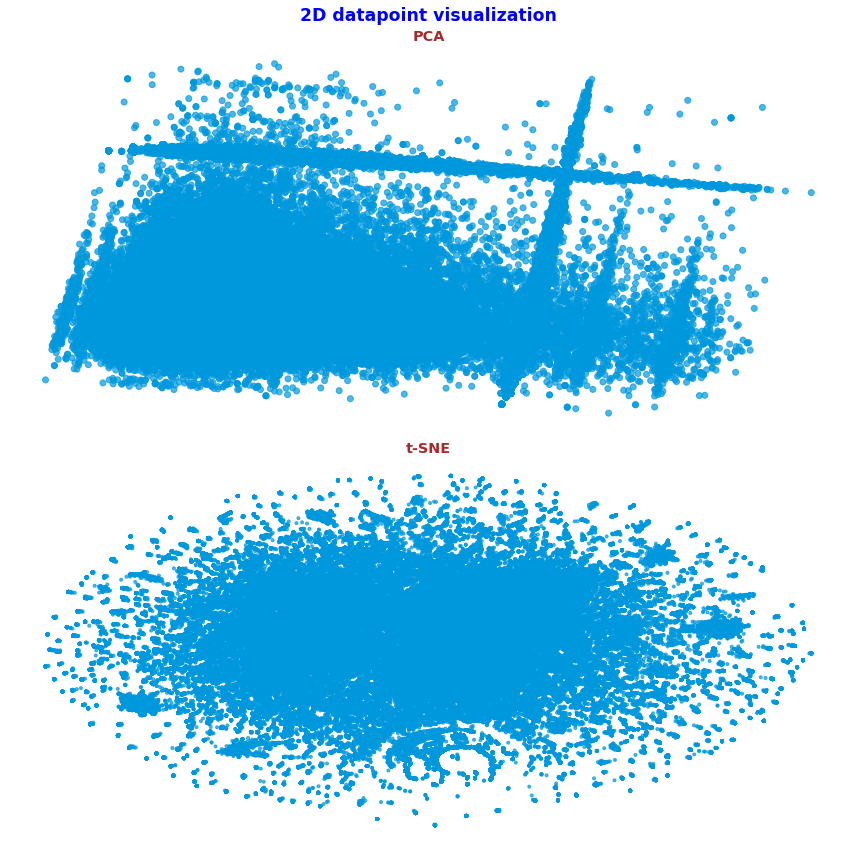

In [24]:
plot_skill = "2D datapoint visualization"
palette = sns.color_palette("hls", as_cmap=True)
colors = cm.nipy_spectral(np.array([0.3]*skill_embeddings.shape[0]))

# Visualize clusters with PCA and t-SNE
visualize_cluster(
    plot_skill,
    (12, 12),
    colors,
    palette,
    pca_datapoint,
    tsne_datapoint,
    None,
    pca=True,
    tsne=True,
    mds=False
)